In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
covid_mit = pd.read_csv('data/latest_Europe_Central_Asia.csv')

In [3]:
ind = covid_mit[covid_mit['countryname'] == 'Note: '].index[0]
covid_mit.drop(covid_mit.index[ind], inplace=True)
#covid_mit[covid_mit['countryname'] == 'Note: ']

In [4]:
covid_mit.head()

countryname countrycode               region        date  \
0     Albania         ALB  Europe_Central_Asia  20200828.0   
1     Albania         ALB  Europe_Central_Asia  20200828.0   
2     Albania         ALB  Europe_Central_Asia  20200828.0   
3     Albania         ALB  Europe_Central_Asia  20200828.0   
4     Albania         ALB  Europe_Central_Asia  20200907.0   

                          policytype  policyvalue flag new_level prev_level  \
0                 C1: School closing          3.0    1        3G         2G   
1           C3: Cancel public events          2.0    1        2G         2G   
2     C4: Restrictions on gatherings          4.0    1        4G         4G   
3  C8: International travel controls          1.0    .        1.         2.   
4              C2: Workplace closing          2.0    1        2G         2G   

                                               notes  
0  'Pre-university schools will re-open on Septem...  
1  Large gatherings continue to be banned and cin...  
2  Large gatherings continue to be banned and cin...  
3  'There are no quarantine requirements for inco...  
4  Following an uptick in cases, Albanian authori...

In [5]:
covid_mit['countryname'].describe()

count            572
unique            47
top       Azerbaijan
freq              32
Name: countryname, dtype: object

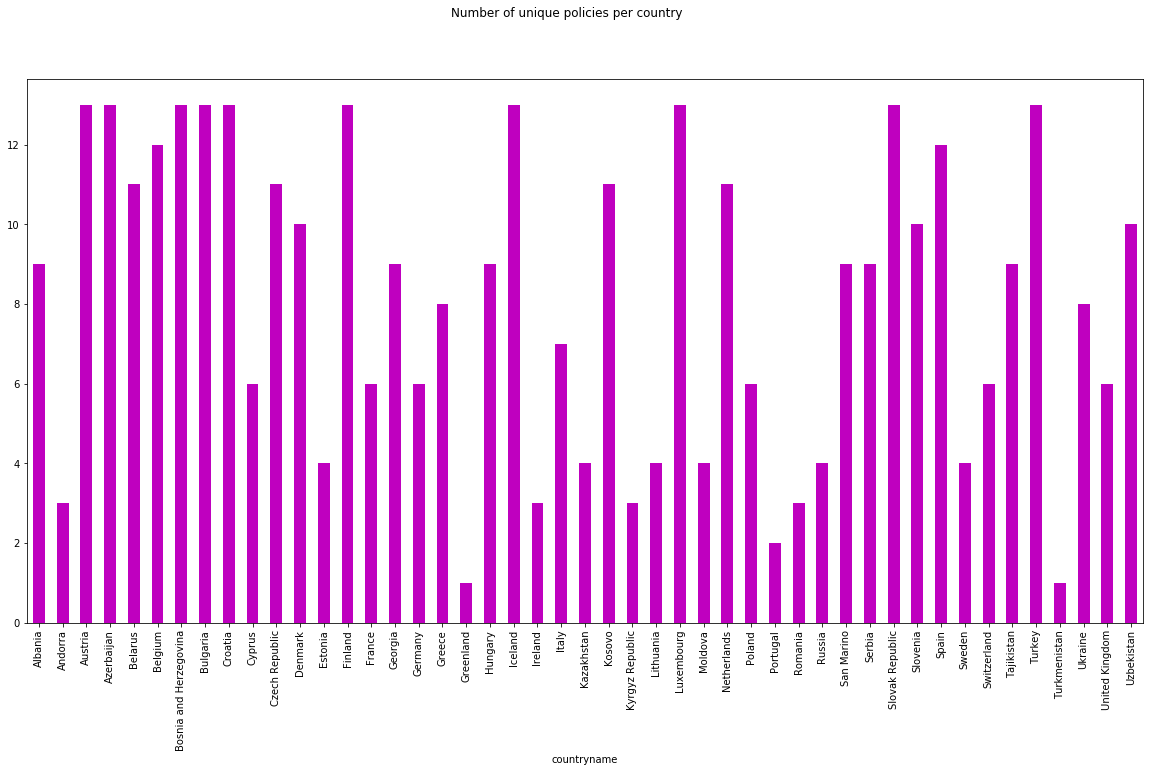

In [6]:
fig = plt.figure(figsize=(20,10))
fig.suptitle('Number of unique policies per country')
covid_mit.groupby('countryname')['policytype'].nunique().plot(kind='bar', color='m')
fig.savefig('unique_policies_per_country' + ".png", format='png', bbox_inches = 'tight')

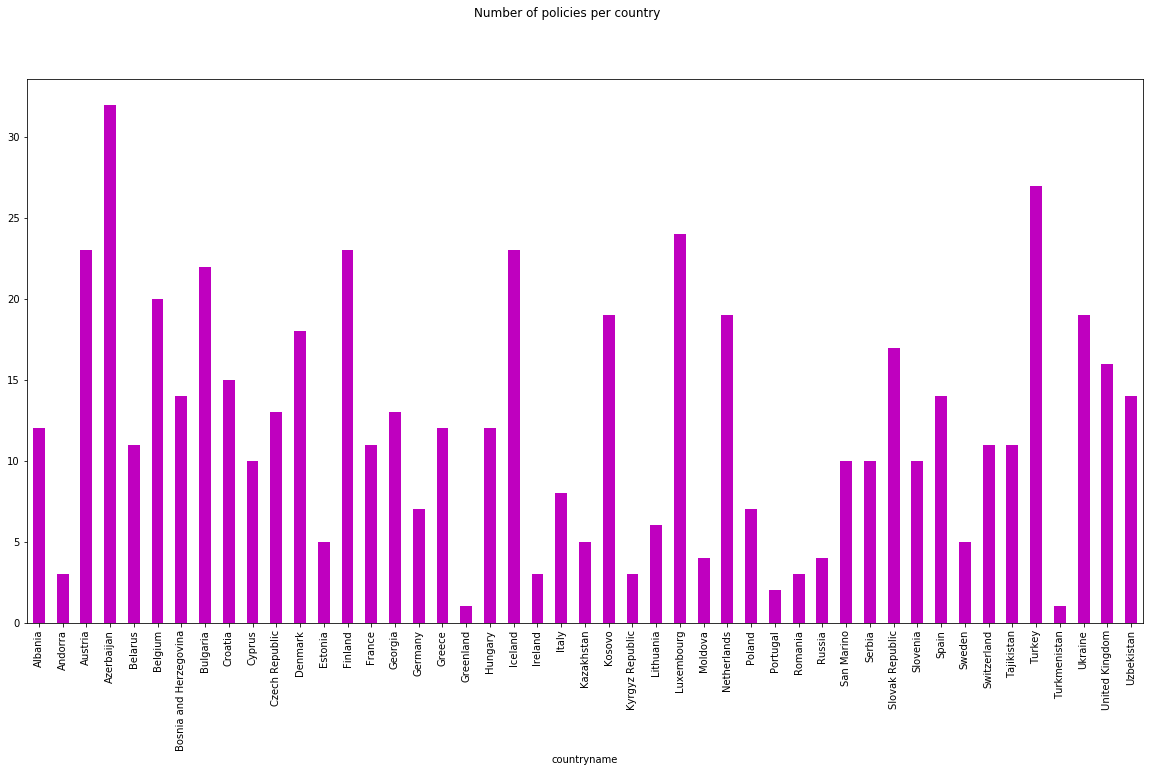

In [7]:
fig = plt.figure(figsize=(20,10))
fig.suptitle('Number of policies per country')
covid_mit.groupby('countryname')['policytype'].count().plot(kind='bar', color='m')
fig.savefig('policies_per_country' + ".png", format='png', bbox_inches = 'tight')

In [8]:
covid_mit.groupby('policytype')['countryname'].nunique()

policytype
C1: School closing                       41
C2: Workplace closing                    36
C3: Cancel public events                 33
C4: Restrictions on gatherings           42
C5: Close public transport               25
C6: Stay at home requirements            26
C7: Restrictions on internal movement    33
C8: International travel controls        39
E1: Income support                       26
E2: Debt/contract relief                 25
H1: Public information campaigns         17
H2: Testing policy                       22
H3: Contact tracing                      16
Name: countryname, dtype: int64

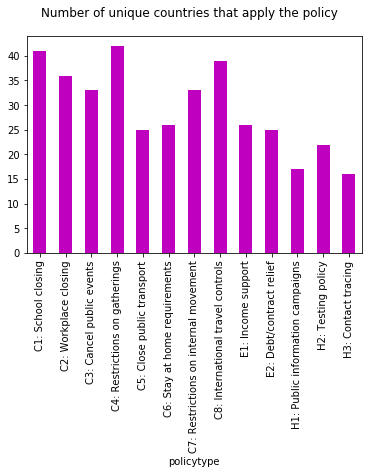

In [9]:
fig = plt.figure()
fig.suptitle('Number of unique countries that apply the policy')
covid_mit.groupby('policytype')['countryname'].nunique().plot(kind='bar', color='m')
fig.savefig('countries_per_policies' + ".png", format='png', bbox_inches = 'tight')

In [10]:
covid_mit.groupby('countryname')['policytype'].nunique()

countryname
Albania                    9
Andorra                    3
Austria                   13
Azerbaijan                13
Belarus                   11
Belgium                   12
Bosnia and Herzegovina    13
Bulgaria                  13
Croatia                   13
Cyprus                     6
Czech Republic            11
Denmark                   10
Estonia                    4
Finland                   13
France                     6
Georgia                    9
Germany                    6
Greece                     8
Greenland                  1
Hungary                    9
Iceland                   13
Ireland                    3
Italy                      7
Kazakhstan                 4
Kosovo                    11
Kyrgyz Republic            3
Lithuania                  4
Luxembourg                13
Moldova                    4
Netherlands               11
Poland                     6
Portugal                   2
Romania                    3
Russia                     4
Sa

In [11]:
df = covid_mit.groupby('countryname')['policytype'].nunique().reset_index()
df['uniq_policy'] = df['policytype']
df = df.drop(['policytype'], axis=1)

In [12]:
fig = px.choropleth(df,
                    locations="countryname", 
                    color='uniq_policy',
                    locationmode = 'country names')
fig.update_layout(
    title_text = 'Number of unique policies per country',
    geo_scope='europe',
)
fig.show()

In [13]:
covid_cases = pd.read_csv('data/cases_country.csv')
covid_cases.head()

Country_Region          Last_Update       Lat      Long_  Confirmed  Deaths  \
0    Afghanistan  2020-09-27 03:23:29  33.93911  67.709953    39192.0  1453.0   
1        Albania  2020-09-27 03:23:29  41.15330  20.168300    13153.0   375.0   
2        Algeria  2020-09-27 03:23:29  28.03390   1.659600    50914.0  1711.0   
3        Andorra  2020-09-27 03:23:29  42.50630   1.521800     1836.0    53.0   
4         Angola  2020-09-27 03:23:29 -11.20270  17.873900     4672.0   171.0   

   Recovered   Active  Incident_Rate  People_Tested  People_Hospitalized  \
0    32635.0   5104.0     100.677293            NaN                  NaN   
1     7397.0   5381.0     457.050525            NaN                  NaN   
2    35756.0  13447.0     116.106702            NaN                  NaN   
3     1263.0    520.0    2376.237624            NaN                  NaN   
4     1639.0   2862.0      14.215183            NaN                  NaN   

   Mortality_Rate  UID ISO3  
0        3.707389    4  AFG  
1        2.851061    8  ALB  
2        3.360569   12  DZA  
3        2.886710   20  AND  
4        3.660103   24  AGO

In [14]:
df['confirmed'] = ""

In [15]:
for country in df['countryname']:
    conf = covid_cases['Confirmed'][covid_cases['Country_Region'] == country]
    mask = df['countryname'] == country 
    if conf.empty: 
        df.loc[mask,'confirmed'] = "Empty"
    else:
        df.loc[mask,'confirmed'] = str(conf.values[0])

In [16]:
mask = df['confirmed'] == "Empty"
for country in df['countryname'].loc[mask]:
    if country == 'Czech Republic':
        conf = covid_cases['Confirmed'][covid_cases['Country_Region'] == 'Czechia']
    if country == 'Slovak Republic':
        conf = covid_cases['Confirmed'][covid_cases['Country_Region'] == 'Slovakia']
    if country == 'Kyrgyz Republic':
        conf = covid_cases['Confirmed'][covid_cases['Country_Region'] == 'Kyrgyzstan']
    if country == 'Greenland':
        conf = pd.Series(14) #No entry in the dataset, checked on the 20th of Semptember
    if country == 'Turkmenistan':
        conf = pd.Series(0) #Not given
    mask = df['countryname'] == country
    df.loc[mask, 'confirmed'] = str(conf.values[0]) 

In [17]:
df['confirmed'] = df['confirmed'].astype(float)

In [18]:
df.sort_values(by=['confirmed'], ascending=False)

countryname  uniq_policy  confirmed
33                  Russia            4  1138509.0
38                   Spain           12   716481.0
14                  France            6   552454.0
45          United Kingdom            6   431817.0
42                  Turkey           13   312966.0
22                   Italy            7   308104.0
16                 Germany            6   285026.0
44                 Ukraine            8   200566.0
32                 Romania            3   121235.0
29             Netherlands           11   113518.0
5                  Belgium           12   112803.0
23              Kazakhstan            4   107723.0
39                  Sweden            4    90923.0
30                  Poland            6    85980.0
4                  Belarus           11    77289.0
31                Portugal            2    72939.0
10          Czech Republic           11    63294.0
46              Uzbekistan           10    54819.0
40             Switzerland            6    51864.0
28                 Moldova            4    50534.0
25         Kyrgyz Republic            3    46090.0
2                  Austria           13    42214.0
3               Azerbaijan           13    39895.0
21                 Ireland            3    34560.0
35                  Serbia            9    33312.0
6   Bosnia and Herzegovina           13    26797.0
11                 Denmark           10    26687.0
19                 Hungary            9    23077.0
7                 Bulgaria           13    19997.0
17                  Greece            8    17228.0
8                  Croatia           13    16007.0
0                  Albania            9    13153.0
24                  Kosovo           11    12683.0
41              Tajikistan            9     9605.0
13                 Finland           13     9577.0
36         Slovak Republic           13     8600.0
27              Luxembourg           13     8233.0
37                Slovenia           10     5191.0
15                 Georgia            9     4960.0
26               Lithuania            4     4295.0
12                 Estonia            4     3165.0
20                 Iceland           13     2601.0
1                  Andorra            3     1836.0
9                   Cyprus            6     1684.0
34              San Marino            9      727.0
18               Greenland            1       14.0
43            Turkmenistan            1        0.0

In [19]:
fig = px.choropleth(df,
                    locations="countryname", 
                    color='confirmed',
                    locationmode = 'country names')
fig.update_layout(
    title_text = 'Number of confirmed COVID-19 cases per country',
    geo_scope='europe',
)
fig.show()

In [20]:
pop_den = pd.read_csv("data/API_EN.POP.DNST.csv")

In [21]:
pop_den.loc[pop_den['Country Name'] == 'Kosovo', '2018'] = pop_den[pop_den['Country Name'] == 'Kosovo']['2017']
pop_den.loc[pop_den['Country Name'] == 'Russian Federation', 'Country Name'] = "Russia"

In [22]:
pop_den = pop_den[['Country Name', '2018']]
pop_den.head()

Country Name        2018
0        Aruba  588.027778
1  Afghanistan   56.937760
2       Angola   24.713052
3      Albania  104.612263
4      Andorra  163.842553

In [23]:
pop_den['Population Density 2018'] = pop_den['2018']
pop_den = pop_den.drop(['2018'], axis=1)
pop_den.head()

Country Name  Population Density 2018
0        Aruba               588.027778
1  Afghanistan                56.937760
2       Angola                24.713052
3      Albania               104.612263
4      Andorra               163.842553

In [24]:
df['Pop_Den_2018'] = ""

In [25]:
for country in df['countryname']:
    conf = pop_den['Population Density 2018'][pop_den['Country Name'] == country]
    mask = df['countryname'] == country 
    if conf.empty: 
        df.loc[mask,'Pop_Den_2018'] = "Empty"
    else:
        df.loc[mask,'Pop_Den_2018'] = str(conf.values[0])

In [26]:
df.sort_values(by=['Pop_Den_2018'], ascending=False)

countryname  uniq_policy  confirmed         Pop_Den_2018
28                 Moldova            4    50534.0     94.2644302783293
38                   Spain           12   716481.0     93.6771974435832
32                 Romania            3   121235.0      84.633801286509
17                  Greece            8    17228.0    83.26518231186971
33                  Russia            4  1138509.0    8.822067953155882
35                  Serbia            9    33312.0     79.8376857992225
46              Uzbekistan           10    54819.0     77.4708509637988
44                 Ukraine            8   200566.0     77.0296708039151
8                  Croatia           13    16007.0    73.04937455325229
21                 Ireland            3    34560.0    70.65344752503991
41              Tajikistan            9     9605.0    65.57271417249079
15                 Georgia            9     4960.0      65.197330207495
6   Bosnia and Herzegovina           13    26797.0       64.92048828125
7                 Bulgaria           13    19997.0     64.7110998526161
23              Kazakhstan            4   107723.0     6.76982572137645
34              San Marino            9      727.0     563.083333333333
29             Netherlands           11   113518.0   511.47592757494795
4                  Belarus           11    77289.0   46.719503788420404
26               Lithuania            4     4295.0     44.7230757742448
5                  Belgium           12   112803.0     377.379590488771
25         Kyrgyz Republic            3    46090.0   32.965589155370196
12                 Estonia            4     3165.0   30.411249137336103
20                 Iceland           13     2601.0   3.5184139650872797
45          United Kingdom            6   431817.0   274.70898193692403
27              Luxembourg           13     8233.0   250.18518518518502
39                  Sweden            4    90923.0   24.981498121823698
16                 Germany            6   285026.0      237.30759674834
40             Switzerland            6    51864.0     215.465350480429
22                   Italy            7   308104.0     205.418372203713
13                 Finland           13     9577.0     18.1485472672831
24                  Kosovo           11    12683.0   164.50840451915101
1                  Andorra            3     1836.0     163.842553191489
11                 Denmark           10    26687.0     137.976565849012
10          Czech Republic           11    63294.0     137.657705257705
9                   Cyprus            6     1684.0     128.708333333333
30                  Poland            6    85980.0     124.023482151605
14                  France            6   552454.0     122.299437237519
3               Azerbaijan           13    39895.0   120.23431716463001
43            Turkmenistan            1        0.0   12.450594769433698
36         Slovak Republic           13     8600.0   113.28558652246299
31                Portugal            2    72939.0   112.26194121729999
19                 Hungary            9    23077.0     107.981486799956
2                  Austria           13    42214.0     107.127966860564
42                  Turkey           13   312966.0     106.960128893104
0                  Albania            9    13153.0   104.61226277372299
37                Slovenia           10     5191.0      102.96366052404
18               Greenland            1       14.0  0.13649165550006098

In [27]:
df['Pop_Den_2018'] = df['Pop_Den_2018'].astype(float)

In [28]:
fig = px.choropleth(df,
                    locations="countryname", 
                    color='Pop_Den_2018',
                    locationmode = 'country names')
fig.update_layout(
    title_text = 'Population Density per country',
    geo_scope='europe',
)
fig.show()

In [29]:
income_country = pd.read_csv("data/country_income_labels.csv")

In [30]:
income_country.head()

Country Code                     Region          IncomeGroup SpecialNotes  \
0          ABW  Latin America & Caribbean          High income          NaN   
1          AFG                 South Asia           Low income          NaN   
2          AGO         Sub-Saharan Africa  Lower middle income          NaN   
3          ALB      Europe & Central Asia  Upper middle income          NaN   
4          AND      Europe & Central Asia          High income          NaN   

     TableName  Unnamed: 5  
0        Aruba         NaN  
1  Afghanistan         NaN  
2       Angola         NaN  
3      Albania         NaN  
4      Andorra         NaN

In [31]:
income_country.loc[income_country['TableName'] == 'Russian Federation', 'TableName'] = "Russia"

In [32]:
income_country = income_country[['TableName', 'IncomeGroup']]
income_country.head()

TableName          IncomeGroup
0        Aruba          High income
1  Afghanistan           Low income
2       Angola  Lower middle income
3      Albania  Upper middle income
4      Andorra          High income

In [33]:
df['Income_Group'] = ""

In [34]:
for country in df['countryname']:
    conf = income_country['IncomeGroup'][income_country['TableName'] == country]
    mask = df['countryname'] == country 
    if conf.empty: 
        df.loc[mask,'Income_Group'] = "Empty"
    else:
        df.loc[mask,'Income_Group'] = str(conf.values[0])

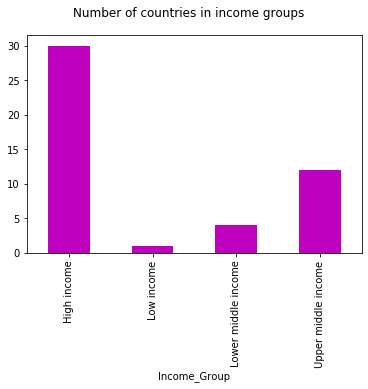

In [35]:
fig = plt.figure()
fig.suptitle('Number of countries in income groups')
df.groupby('Income_Group')['countryname'].count().plot(kind='bar', color='m')
fig.savefig('income_groups' + ".png", format='png', bbox_inches = 'tight')

In [36]:
mobility = pd.read_csv("data/Global_Mobility_Report.csv")
mobility = mobility[['country_region', 'date', 'retail_and_recreation_percent_change_from_baseline', 
                     'grocery_and_pharmacy_percent_change_from_baseline', 
                     'parks_percent_change_from_baseline', 
                     'transit_stations_percent_change_from_baseline', 
                     'workplaces_percent_change_from_baseline', 
                     'residential_percent_change_from_baseline']]

/Users/klacka/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning:

Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.



In [37]:
mobility['date'] = pd.to_datetime(mobility['date'])
mobility.loc[mobility['country_region'] == 'Czechia', 'country_region'] = "Czech Republic"
mobility.loc[mobility['country_region'] == 'Slovakia', 'country_region'] = "Slovak Republic"

In [38]:
mobility = mobility.dropna()

In [39]:
mobility = mobility.groupby(['country_region','date']).mean() #TODO: Normalize for population

In [40]:
mobility.index = pd.MultiIndex.from_tuples(mobility.index)
mobility.index.names = ['country_region', 'date']

In [41]:
mobility = mobility.reset_index()
mobility = mobility.set_index('date')
mobility 

country_region  retail_and_recreation_percent_change_from_baseline  \
date                                                                            
2020-02-15    Afghanistan                                         -11.000000    
2020-02-16    Afghanistan                                           1.500000    
2020-02-17    Afghanistan                                           3.500000    
2020-02-18    Afghanistan                                           1.000000    
2020-02-19    Afghanistan                                          -2.500000    
...                   ...                                                ...    
2020-08-12       Zimbabwe                                         -21.250000    
2020-08-13       Zimbabwe                                         -18.500000    
2020-08-14       Zimbabwe                                         -20.250000    
2020-08-15       Zimbabwe                                         -18.250000    
2020-08-16       Zimbabwe                                         -23.666667    

            grocery_and_pharmacy_percent_change_from_baseline  \
date                                                            
2020-02-15                                         -11.000000   
2020-02-16                                          10.000000   
2020-02-17                                          11.000000   
2020-02-18                                           4.500000   
2020-02-19                                           2.500000   
...                                                       ...   
2020-08-12                                         -11.000000   
2020-08-13                                          -6.750000   
2020-08-14                                          -3.750000   
2020-08-15                                           2.250000   
2020-08-16                                         -11.333333   

            parks_percent_change_from_baseline  \
date                                             
2020-02-15                           -7.000000   
2020-02-16                            0.000000   
2020-02-17                           -0.500000   
2020-02-18                            3.000000   
2020-02-19                           -2.000000   
...                                        ...   
2020-08-12                          -13.500000   
2020-08-13                          -12.750000   
2020-08-14                          -13.000000   
2020-08-15                           -7.500000   
2020-08-16                          -16.666667   

            transit_stations_percent_change_from_baseline  \
date                                                        
2020-02-15                                      -2.000000   
2020-02-16                                      10.000000   
2020-02-17                                       9.500000   
2020-02-18                                       8.500000   
2020-02-19                                      -0.500000   
...                                                   ...   
2020-08-12                                     -36.000000   
2020-08-13                                     -35.000000   
2020-08-14                                     -33.500000   
2020-08-15                                     -28.250000   
2020-08-16                                     -50.333333   

            workplaces_percent_change_from_baseline  \
date                                                  
2020-02-15                               -33.500000   
2020-02-16                                 3.000000   
2020-02-17                                 4.500000   
2020-02-18                                 5.000000   
2020-02-19                                 3.000000   
...                                             ...   
2020-08-12                               -25.250000   
2020-08-13                               -25.250000   
2020-08-14                               -21.750000   
2020-08-15                                -1.750000   
2020-0

In [42]:
activity_names = mobility.columns[2:]

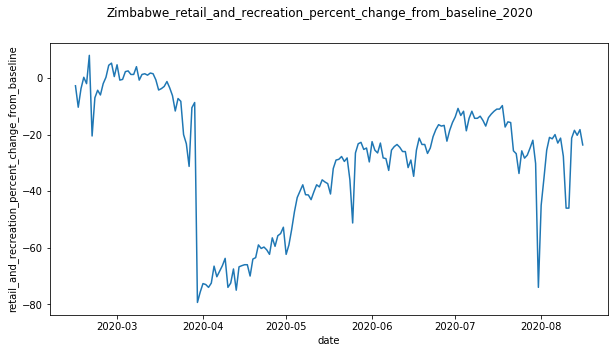

In [43]:
activity = 'retail_and_recreation_percent_change_from_baseline'
country = 'Zimbabwe'
y = mobility[activity][mobility['country_region'] == country]
x = mobility.index[mobility['country_region'] == country]
title = country + "_" + activity + "_2020"
fig = plt.figure(figsize=(10,5))
fig.suptitle(title)
sns.lineplot(x,y)

In [44]:
def plot_activities_for(country):
    for activity in activity_names:
        y = mobility[mobility['country_region'] == country][activity]
        x = mobility.index[mobility['country_region'] == country]
        title = country + "_" + activity + "_2020"
        fig = plt.figure(figsize=(10,5))
        fig.suptitle(title)
        sns.lineplot(x,y)
        fig.savefig('plots/activities/' + title + ".pdf", format='pdf', bbox_inches = 'tight')
        plt.close(fig)

In [45]:
#for country in df['countryname']:
    #plot_activities_for(country)

In [46]:
#Albania, Andorra, Azerbajian, Cyprus, Greenland, Iceland, Kosovo, San Marino, Turkmenistan, Uzbekistan, Kyrgyz (missing)

In [97]:
data_dict=pd.read_excel('data/oxford.xlsx',sheet_name=None)
data_dict['index_governmentresponse'].head()

CountryName CountryCode  01jan2020  02jan2020  03jan2020  04jan2020  \
0        Aruba         ABW        0.0        0.0        0.0        0.0   
1  Afghanistan         AFG        0.0        0.0        0.0        0.0   
2       Angola         AGO        0.0        0.0        0.0        0.0   
3     Anguilla         AIA        0.0        0.0        0.0        0.0   
4      Albania         ALB        0.0        0.0        0.0        0.0   

   05jan2020  06jan2020  07jan2020  08jan2020  ...  20sep2020  21sep2020  \
0        0.0        0.0        0.0        0.0  ...  62.500000  58.650002   
1        0.0        0.0        0.0        0.0  ...  26.280001  26.280001   
2        0.0        0.0        0.0        0.0  ...  64.739998  64.739998   
3        0.0        0.0        0.0        0.0  ...  29.490000  29.490000   
4        0.0        0.0        0.0        0.0  ...  50.639999  50.639999   

   22sep2020  23sep2020  24sep2020  25sep2020  26sep2020  27sep2020  \
0  58.650002  58.650002  58.650002  58.650002  58.650002  58.650002   
1        NaN        NaN        NaN        NaN        NaN        NaN   
2  64.739998  64.739998  64.739998  64.739998  64.739998  64.739998   
3  29.490000  29.490000  29.490000  29.490000  29.490000  29.490000   
4  50.639999        NaN        NaN        NaN        NaN        NaN   

   28sep2020  29sep2020  
0  58.650002        NaN  
1        NaN        NaN  
2  64.739998        NaN  
3        NaN        NaN  
4        NaN        NaN  

[5 rows x 275 columns]

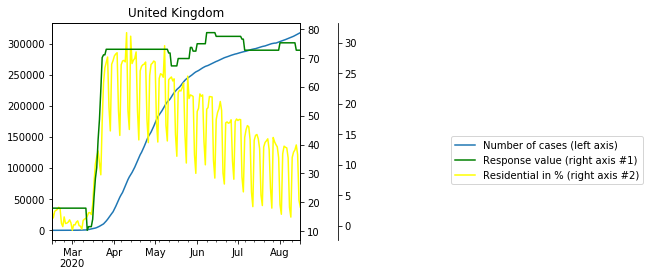

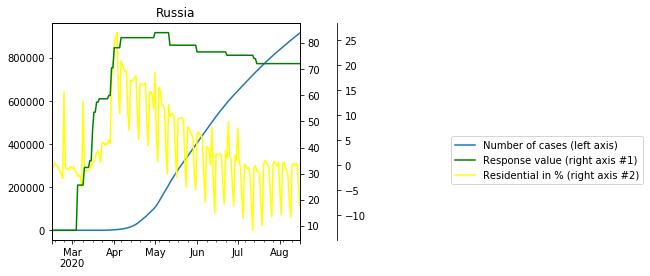

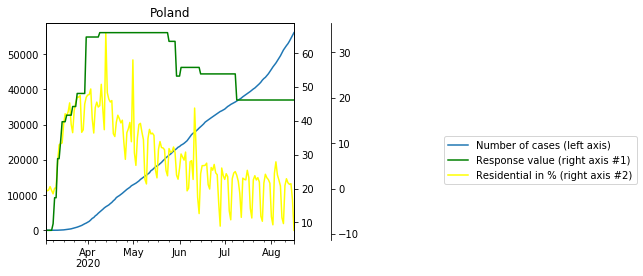

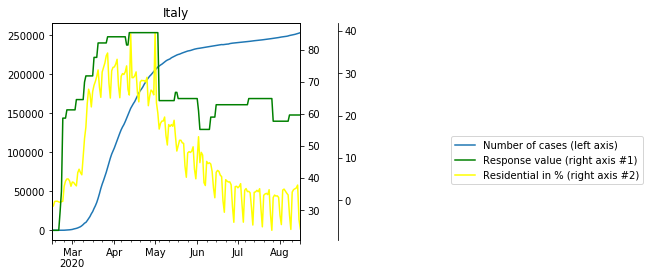

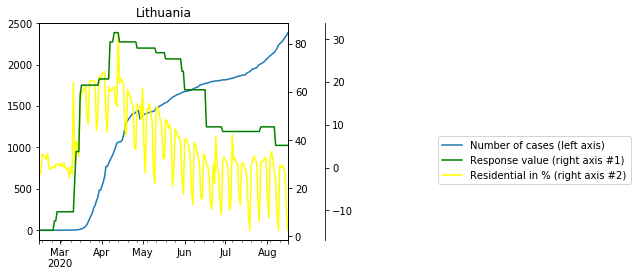

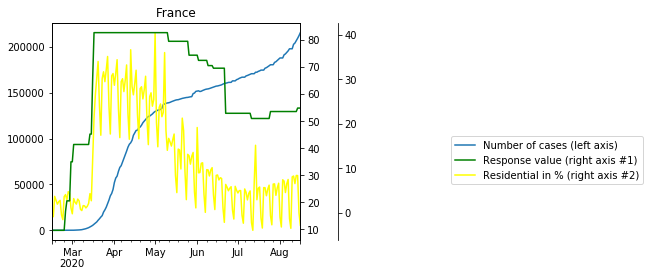

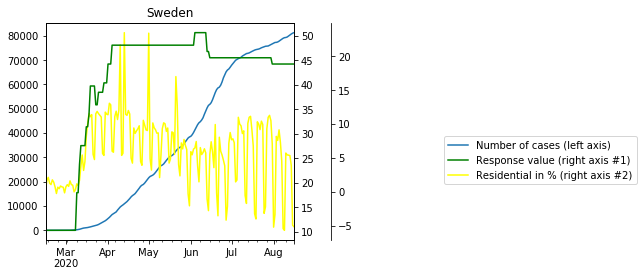

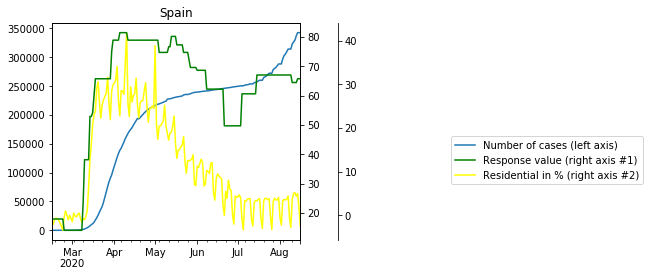

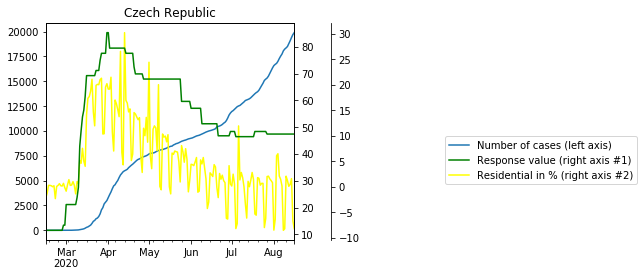

In [86]:
for plotcountry in ["United Kingdom", 'Russia', 'Poland', 'Italy','Lithuania','France','Sweden','Spain', 'Czech Republic']:
    cases=data_dict['confirmedcases'].loc[data_dict['confirmedcases']['CountryName']==plotcountry].T
    cases.drop(index=['CountryName','CountryCode'],inplace=True)
    cases.rename(mapper={cases.columns[0]:"cases"},inplace=True,axis=1)

    plotdata=data_dict['index_governmentresponse'].loc[data_dict['index_governmentresponse']['CountryName']==plotcountry].T
    plotdata.drop(index=['CountryName','CountryCode'],inplace=True)
    plotdata.rename(mapper={plotdata.columns[0]:"responsevalue"},inplace=True,axis=1)
    plotdata=pd.concat([cases,plotdata],axis=1)
    #plotdata.head()
    plotdata.index = pd.to_datetime(plotdata.index)
    
    mob = mobility[mobility['country_region'] == plotcountry]
    plotdata = plotdata.join(mob)
    plotdata = plotdata.join(mob)
    plotdata.dropna(inplace=True)
    
    fig, main_ax = plt.subplots()
    ax2 = main_ax.twinx()
    
    rspine = ax2.spines['right']
    rspine.set_position(('axes', 1.15))
    ax2.set_frame_on(True)
    ax2.patch.set_visible(False)
    fig.subplots_adjust(right=0.7)
    
    plotdata.cases.plot(ax=main_ax,use_index=True)
    plotdata.responsevalue.plot(ax=main_ax,secondary_y=True, use_index=True, color='green')
    plotdata['residential_percent_change_from_baseline'].plot(ax=ax2, use_index=True, color='yellow')
    ax2.legend([main_ax.get_lines()[0], main_ax.right_ax.get_lines()[0], ax2.get_lines()[0]],\
           ['Number of cases (left axis)','Response value (right axis #1)', 'Residential in % (right axis #2)' ], bbox_to_anchor=(2.4, 0.5))
    plt.title(plotcountry)
    #fig.savefig('plots/combined_plots/residential_' + plotcountry + ".pdf", format='pdf', bbox_inches = 'tight')

In [101]:
 data_dict.keys()

dict_keys(['index_governmentresponse', 'index_containmenthealth', 'index_stringency', 'index_economicsupport', 'c1_schoolclosing', 'c1_flag', 'c2_workplaceclosing', 'c2_flag', 'c3_cancelpublicevents', 'c3_flag', 'c4_restrictionsongatherings', 'c4_flag', 'c5_closepublictransport', 'c5_flag', 'c6_stayathomerequirements', 'c6_flag', 'c7_domestictravel', 'c7_flag', 'c8_internationaltravel', 'e1_incomesupport', 'e1_flag', 'e2_debtcontractrelief', 'h1_publicinfocampaign', 'h1_flag', 'h2_testingpolicy', 'h3_contacttracing', 'confirmedcases', 'confirmeddeaths'])

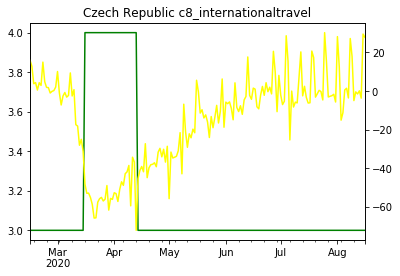

In [110]:
country = "Czech Republic"
policy = "c8_internationaltravel"
prop = 'transit_stations_percent_change_from_baseline'

c1_df = data_dict[policy]
c1_df = c1_df.drop('CountryCode', axis=1)

df = c1_df[c1_df['CountryName'] == country]
df = df.T
df.drop('CountryName', inplace=True)
df.index = pd.to_datetime(df_uk.index)
df.rename(columns = {df.columns[0]:policy}, inplace = True)
mob = mobility[mobility['country_region'] == country]
df = df.join(mob)
df.dropna(inplace=True)
    
df[policy].plot(title = country + " " + policy, color='green')
df[prop].plot(secondary_y=True, use_index=True, color='yellow')

In [128]:
first_pass = True

for plotcountry in ["United Kingdom", 'Russia', 'Poland', 'Italy','Lithuania','France','Sweden','Spain', 'Czech Republic']:
    cases=data_dict['confirmedcases'].loc[data_dict['confirmedcases']['CountryName']==plotcountry].T
    cases.drop(index=['CountryName','CountryCode'],inplace=True)
    cases.rename(mapper={cases.columns[0]:"cases"},inplace=True,axis=1)
    

    plotdata=data_dict['index_governmentresponse'].loc[data_dict['index_governmentresponse']['CountryName']==plotcountry].T
    plotdata.drop(index=['CountryName','CountryCode'],inplace=True)
    plotdata.rename(mapper={plotdata.columns[0]:"responsevalue"},inplace=True,axis=1)
    plotdata=pd.concat([cases,plotdata],axis=1)
    plotdata.index = pd.to_datetime(plotdata.index)
    
    
    mob = mobility[mobility['country_region'] == plotcountry]
    plotdata = plotdata.join(mob)
    
    for policy in ["c1_schoolclosing", "c2_workplaceclosing", "c3_cancelpublicevents", "c4_restrictionsongatherings", "c5_closepublictransport", "c6_stayathomerequirements", "c7_domestictravel", "c8_internationaltravel", "h1_publicinfocampaign", "h2_testingpolicy", "h3_contacttracing"]:
        pol = data_dict[policy]
        pol = pol.drop('CountryCode', axis=1)
        pol = pol[pol['CountryName'] == plotcountry]
        pol = pol.T
        pol = pol.drop('CountryName')
        pol.index = pd.to_datetime(pol.index)
        pol.rename(columns = {pol.columns[0]: policy}, inplace = True)
        plotdata = plotdata.join(pol)
        
    plotdata.dropna(inplace=True)
    plotdata.to_csv('data/compiled_countries_policies_mobility.csv', mode='a', header=first_pass)
    first_pass = False